## 模拟操作测试

### 获取鼠标坐标

In [1]:
import pyautogui

try:
    while True:
        # 获取鼠标当前位置
        x, y = pyautogui.position()
        # 清空屏幕并打印最新的鼠标坐标
        print('鼠标坐标：({}, {})'.format(x, y), end='\r', flush=True)
except KeyboardInterrupt:
    print('\n退出程序')


鼠标坐标：(714, 520))
退出程序


## 实际代码

### 评论内容清洗

In [2]:
import re

def clean_text(text):
    # 使用正则表达式匹配并替换指定格式的文本
    cleaned_text0 = re.sub(r'回复 @\w+ :', '', text)
    cleaned_text1 = re.sub(r'@[^ ]+ ', '', cleaned_text0)
    return cleaned_text1


# 示例文本
text = "回复 @Benny仔 :回复 @Benny仔 :这是一条示例回复消息"
# 清洗文本数据
cleaned_text = clean_text(text)
print("清洗前：", text)
print("清洗后：", cleaned_text)

清洗前： 回复 @Benny仔 :回复 @Benny仔 :这是一条示例回复消息
清洗后： 这是一条示例回复消息


### 模拟人类操作自动化询问GPT

请按照如下方式摆放窗口：


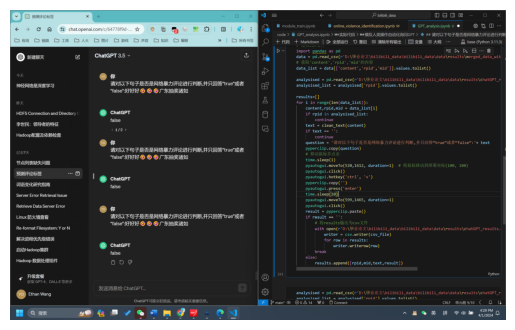

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

print("请按照如下方式摆放窗口：")
# 读取图片
img = mpimg.imread(r"..\data\addition\窗口摆放.png")

# 展示图片
plt.imshow(img)
plt.axis('off')  # 关闭坐标轴
plt.show()


In [6]:
## 请对以下句子是否是网络暴力评论进行判断，并只回答“true”或者“false”：
import pyautogui
import pyperclip
import time
import csv

# 读取csv文件
import pandas as pd
data = pd.read_csv(r'D:\毕业论文\bilibili_data\bilibili_data\data\results\merged_data_with_time_all_sorted_like_10000.csv', encoding='utf-8')
# 获取'content','rpid','mid'的内容
data_list = data[['content','rpid','mid']].values.tolist()

analysised = pd.read_csv(r'D:\毕业论文\bilibili_data\bilibili_data\data\results\chatGPT_results.csv', encoding='utf-8')
analysised_list = analysised['rpid'].values.tolist()

results=[]
for i in range(len(data_list)):
    content,rpid,mid = data_list[i]
    if rpid in analysised_list:
        continue
    text = clean_text(content)
    if text == '':
        continue
    question = '请对以下句子是否是网络暴力评论进行判断,并只回答“true”或者“false”:'+ text
    pyperclip.copy(question)
    # 移动鼠标并点击
    time.sleep(1)
    pyautogui.moveTo(520,1612, duration=1)  # 将鼠标移动到屏幕坐标(100, 100)
    pyautogui.click()
    pyautogui.hotkey('ctrl', 'v')
    pyperclip.copy('')
    pyautogui.press('enter')
    time.sleep(10)
    pyautogui.moveTo(599,1465, duration=1)
    pyautogui.click()
    result = pyperclip.paste()
    if result == '':
        # 将results输出为csv文件
        with open(r'D:\毕业论文\bilibili_data\bilibili_data\data\results\chatGPT_results.csv', 'a', newline='') as csv_file:
            writer = csv.writer(csv_file)
            for row in results:
                writer.writerow(row)
        break
    else:
        results.append([rpid,mid,text,result])    

In [7]:
analysised = pd.read_csv(r'D:\毕业论文\bilibili_data\bilibili_data\data\results\chatGPT_results.csv', encoding='utf-8')
analysised_list = analysised['rpid'].values.tolist()
len(analysised_list)

325